<a href="https://colab.research.google.com/github/shagasheetal-hue/Data-ANALYSIS-LAB-1/blob/main/DATAANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preview of the dataset:


,Sensor_ID,Reading_Number,Temperature_C,Location,Timestamp
0,S1,1,22.671458,Lab-A,2025-01-01 00:00:00
1,S2,2,22.513979,Lab-B,2025-01-01 00:15:00
2,S3,3,21.807690,Lab-C,2025-01-01 00:30:00
3,S4,4,24.917800,Lab-D,2025-01-01 00:45:00
4,S5,5,23.678449,Lab-E,2025-01-01 01:00:00



Average temperature per sensor:


,Sensor_ID,Average_Temperature
0,S1,23.103596
1,S2,23.411689
2,S3,23.098647
3,S4,23.330205
4,S5,23.037844



Sample rows with anomaly flag:


,Sensor_ID,Reading_Number,Temperature_C,Location,Timestamp,Anomaly
0,S1,1,22.671458,Lab-A,2025-01-01 00:00:00,False
1,S2,2,22.513979,Lab-B,2025-01-01 00:15:00,False
2,S3,3,21.807690,Lab-C,2025-01-01 00:30:00,False
3,S4,4,24.917800,Lab-D,2025-01-01 00:45:00,False
4,S5,5,23.678449,Lab-E,2025-01-01 01:00:00,False



Number of anomalies per sensor:


,Sensor_ID,Anomaly_Count
0,S1,0
1,S2,0
2,S3,0
3,S4,0
4,S5,0



Anomalies by location:


,Location,Total_Anomalies



Sensor summary report:


,Sensor_ID,Total_Readings,Average_Temperature,Number_of_Anomalies,Percentage_of_Anomalies
0,S1,20,23.103596,0,0.0
1,S2,20,23.411689,0,0.0
2,S3,20,23.098647,0,0.0
3,S4,20,23.330205,0,0.0
4,S5,20,23.037844,0,0.0


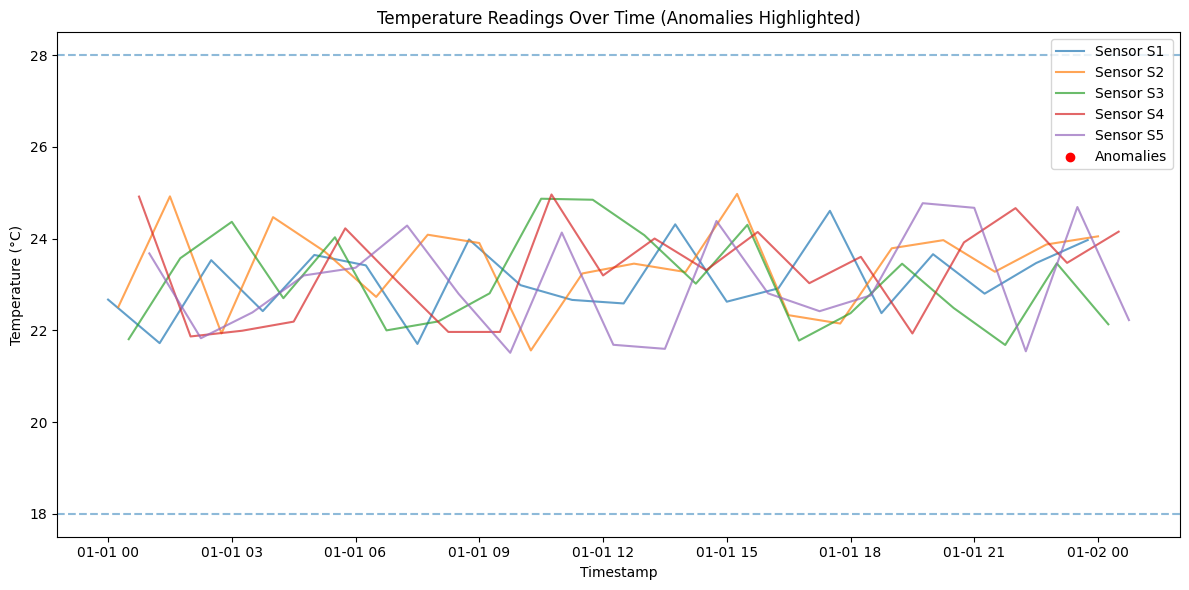

In [1]:
# ============================================
# STEP 0: Import required libraries
# ============================================
import pandas as pd
import matplotlib.pyplot as plt

# Ensure plots display properly in Colab
%matplotlib inline

# ============================================
# STEP 1: Load and preview the data
# ============================================

# Load the CSV file
df = pd.read_csv("sensor_data_practice.csv")

# Convert Timestamp column to datetime format
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Preview first few rows
print("Preview of the dataset:")
display(df.head())

# ============================================
# STEP 2: Calculate average temperature per sensor
# ============================================

avg_temp_per_sensor = (
    df.groupby("Sensor_ID")["Temperature_C"]
    .mean()
    .reset_index(name="Average_Temperature")
)

print("\nAverage temperature per sensor:")
display(avg_temp_per_sensor)

# ============================================
# STEP 3: Identify readings outside the safe range
# Safe range: 18°C to 28°C
# ============================================

df["Anomaly"] = (df["Temperature_C"] < 18) | (df["Temperature_C"] > 28)

print("\nSample rows with anomaly flag:")
display(df.head())

# ============================================
# STEP 4: Count how many anomalies each sensor has
# ============================================

anomaly_count_per_sensor = (
    df.groupby("Sensor_ID")["Anomaly"]
    .sum()
    .reset_index(name="Anomaly_Count")
)

print("\nNumber of anomalies per sensor:")
display(anomaly_count_per_sensor)

# ============================================
# STEP 5: Identify which sensor location has the most anomalies
# ============================================

anomalies_by_location = (
    df[df["Anomaly"]]
    .groupby("Location")
    .size()
    .reset_index(name="Total_Anomalies")
)

most_anomalies_location = anomalies_by_location.sort_values(
    by="Total_Anomalies", ascending=False
)

print("\nAnomalies by location:")
display(most_anomalies_location)

# ============================================
# STEP 6: Create summary report per sensor
# ============================================

summary_report = (
    df.groupby("Sensor_ID")
    .agg(
        Total_Readings=("Temperature_C", "count"),
        Average_Temperature=("Temperature_C", "mean"),
        Number_of_Anomalies=("Anomaly", "sum")
    )
    .reset_index()
)

# Calculate percentage of anomalies
summary_report["Percentage_of_Anomalies"] = (
    summary_report["Number_of_Anomalies"] /
    summary_report["Total_Readings"] * 100
)

print("\nSensor summary report:")
display(summary_report)

# ============================================
# STEP 7 & 8: Line plot of temperature over time
# Color-coded by sensor and highlighting anomalies
# ============================================

plt.figure(figsize=(12, 6))

# Plot each sensor separately
for sensor_id, sensor_data in df.groupby("Sensor_ID"):
    plt.plot(
        sensor_data["Timestamp"],
        sensor_data["Temperature_C"],
        label=f"Sensor {sensor_id}",
        alpha=0.7
    )

# Highlight anomalous readings
anomalies = df[df["Anomaly"]]
plt.scatter(
    anomalies["Timestamp"],
    anomalies["Temperature_C"],
    color="red",
    label="Anomalies",
    zorder=5
)

# Add safe range reference lines
plt.axhline(18, linestyle="--", alpha=0.5)
plt.axhline(28, linestyle="--", alpha=0.5)

# Plot formatting
plt.xlabel("Timestamp")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Readings Over Time (Anomalies Highlighted)")
plt.legend()
plt.tight_layout()

plt.show()
